In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
# load required libraries
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

In [3]:
# Load in the MNSIT data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


# Tensorflow Sequential

Tensorflow sequential is the group containing the stack of linear format that consists of various layers of the library package tf.keras.Model

This model consists of various layers; every layer is worked upon individually while creating the model.

The methodology followed while building the model is step-by-step and working on a single layer at a particular time. The Sequential tensorflow API is the easiest way using which we can run and create the Keras models. 


*   syntax of the Sequential API method of the Model 

Tensorflow.keras.Sequential(layers = None, name = None)

In [4]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Layers in Neural network

 Neural Networks are like onions: a typical neural network consists of many layers. In fact, the word deep in Deep Learning refers to the many layers that make the network deep.

*   Layers are a logical collection of Nodes/Neurons.
*   Different layers perform different transformations on their inputs, and some layers are better suited for some tasks than others.


*   In the hidden segment, each layer learns different aspects of the data while minimizing the cost function.


1.   Dense or Fully connected layer: This layer is called fully connected, because all input neurons are taken into account by each output neuron. Fully Connected layers in a neural network are those layers where all the inputs from one layer are connected to every activation unit of the next layer.

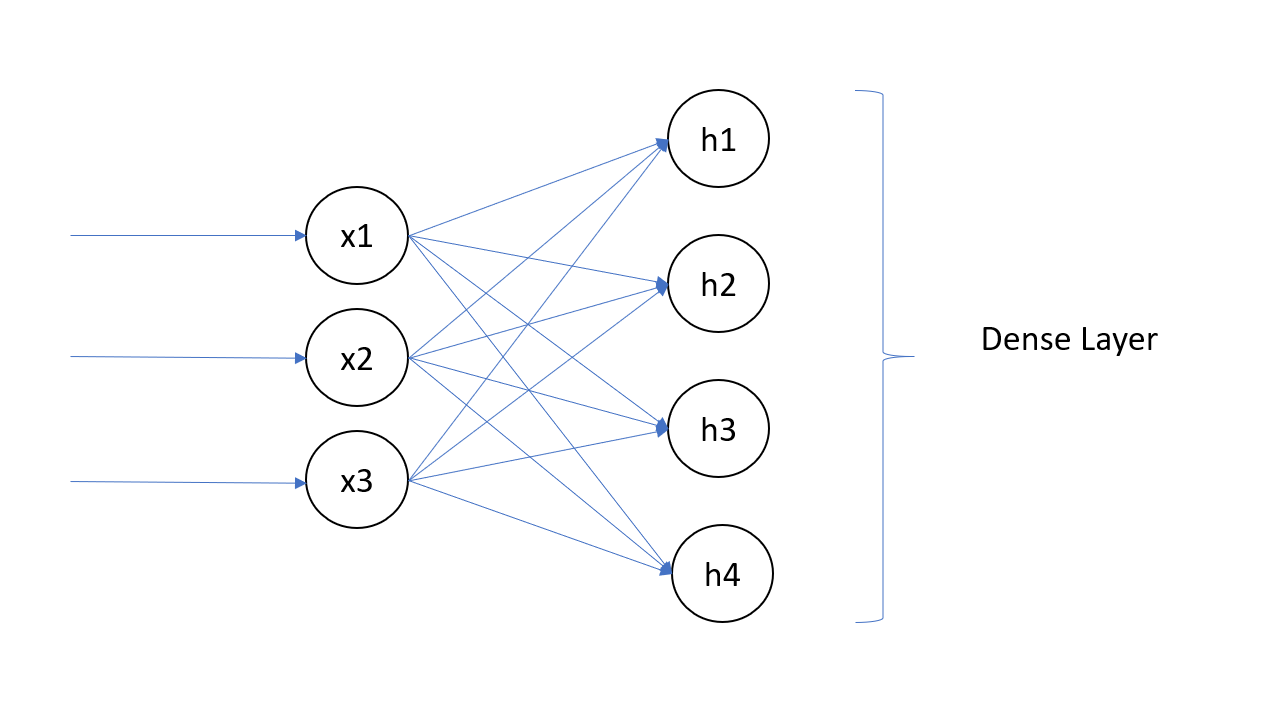

2.   Batch Normalization Layer: Batch Normalization accelerates convergence by reducing internal covariate shifts inside each batch. The batch norm layer normalizes the incoming activations and outputs a new batch where the mean equals 0 and standard deviation equals 1. It subtracts the mean and divides by the standard deviation of the batch.

3. Pooling: Pooling layers are methods for reducing high dimensionality. Pooling layers provide an approach for downsampling feature maps by summarizing the presence of features in patches of the feature map.

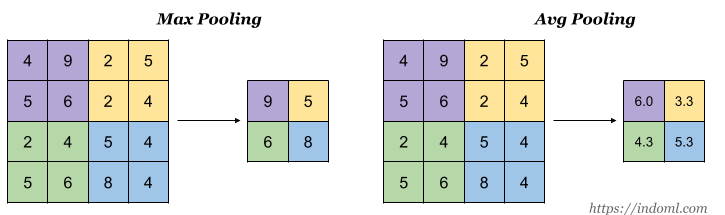
*   Two typs of pooling layers: 1) Max pool 2) Avg pooling


4. Drop out: A dropout layer takes the output of the previous layer's activations and randomly sets a certain fraction (dropout rate) of the activations to 0, canceling or ‘dropping’ them out. It is a common regularization technique used to prevent overfitting in Neural Networks.

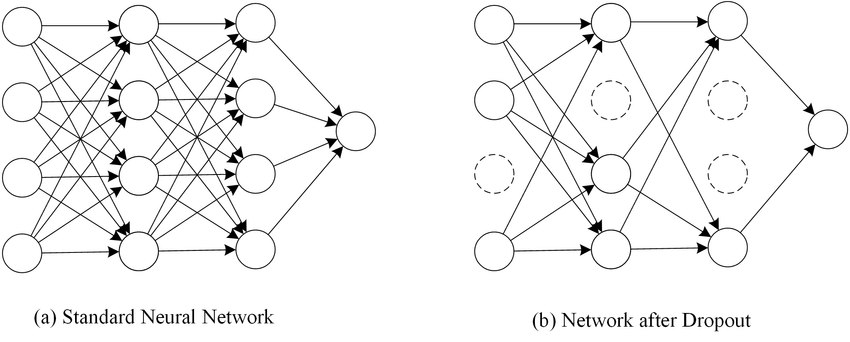







In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.2977 - accuracy: 0.9134 - val_loss: 0.1413 - val_accuracy: 0.9582
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1419 - accuracy: 0.9583 - val_loss: 0.0978 - val_accuracy: 0.9707
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1042 - accuracy: 0.9678 - val_loss: 0.0843 - val_accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0865 - accuracy: 0.9737 - val_loss: 0.0760 - val_accuracy: 0.9766
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0736 - accuracy: 0.9769 - val_loss: 0.0747 - val_accuracy: 0.9776
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0639 - accuracy: 0.9797 - val_loss: 0.0724 - val_accuracy: 0.9788
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0583 - accuracy: 0.9806 - val_loss: 0.0715 - val_accuracy

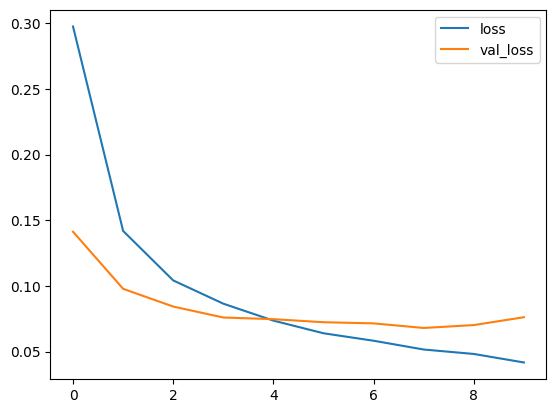

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

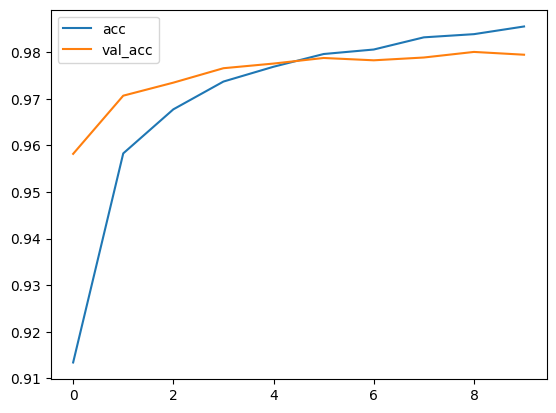

In [8]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [9]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0762 - accuracy: 0.9795
[0.07618273049592972, 0.9794999957084656]


313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[ 972    0    2    1    0    0    2    1    2    0]
 [   0 1127    3    1    0    0    1    2    1    0]
 [   2    1 1012    1    4    1    3    5    3    0]
 [   0    0    4  994    0    3    0    4    3    2]
 [   1    1    1    1  967    0    4    1    0    6]
 [   3    0    0    9    1  870    2    1    4    2]
 [   4    3    0    1    3    5  942    0    0    0]
 [   3    4   10    2    1    0    0  993    0   15]
 [   5    1    4    8    8    1    2    4  936    5]
 [   1    4    0    5   12    2    0    2    1  982]]


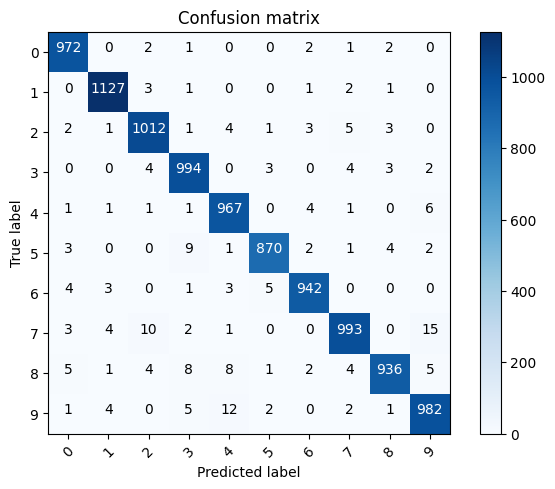

In [10]:
# Plot confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

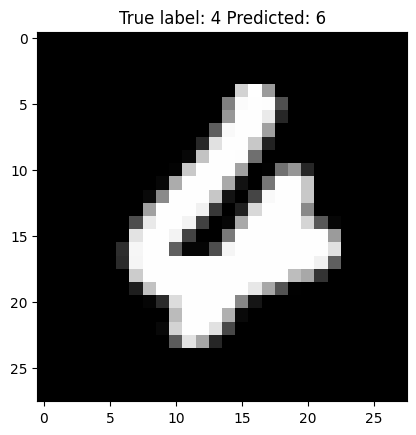

In [15]:
# Plot few misclassified samples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

AS we can see, the model performed pretty good, It's easy to confuse 6 <--> 4, 9 <--> 7, 2 <--> 7, etc.